In [1]:
# This is Jupyter version of 'load_profile_utavg.py' for Secondary schools
# Created 6Apr23
# To calculate average load profile of Schools based on one-year of data
# All outputs are in Wh (raw data is in kWh but I converted it to Wh for hrly plots)
# check outputs with excel: 'avg_ut analysis PJua'
# see also Jupyter files: 'pjua_hrly_plots_all, 'clinics_load_profile_utavg';
# 'prischools_load_profile_utavg'; 'secschools_load_profile_utavg'

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # maybe don't need this

cwd = os.getcwd()
cwd

os.chdir("/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files")
os.getcwd()

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Sites udata/Filled_files'

In [2]:
# Plot all means of Secondary schools 
average_data = {}

filenames = {entry for entry in os.listdir(".") if entry.endswith(".csv") \
if ("Secondary" in entry) or ("secondary" in entry)}
# above lines is what changes between institution type in code 
for filename in filenames:
    data = pd.read_csv(filename, usecols = ["Timestamp","Consumption"])
    data["Timestamp"] = pd.to_datetime(data["Timestamp"],format="%d/%m/%Y %H:%M")
    data["Consumption"] *= 1000 # to convert to Wh
    # data['Consumption'].sum() # check totals if needed
    # Calculate average hourly utilisation
    hrly = data.groupby([data["Timestamp"].dt.hour]).Consumption.mean()
    average_data[filename.split("_gaps_filled")[0].replace("_", " ")] = hrly

# Creates df of Hour as index and sites as column, after calculating avg utilisation
results_frame = pd.DataFrame(average_data)
results_frame.round(2)

,Lokitaung Girls Secondary School,Kawala Girls Secondary School,Salim Mvurya Secondary School,Tiwi Boys Secondary school,Amason Jeffah King Secondary School,Elsa Secondary School,Namortung a Boys Secondary School,Kakalel Boys Secondary School,Mtsamviani Secondary School,Biliqo Day Secondary school,Kiteje Mixed Secondary School
Timestamp,,,,,,,,,,,
0,117.63,29.99,41.08,22.40,115.44,46.33,66.77,23.64,172.48,194.79,211.54
1,118.31,29.47,40.00,21.78,106.11,41.63,64.56,20.06,171.65,193.66,211.88
2,110.12,29.21,39.40,21.11,101.72,35.69,65.51,19.54,170.58,192.84,209.76
3,106.55,30.14,39.27,19.78,99.32,32.51,61.56,20.03,170.12,192.69,207.44
4,104.61,33.84,38.60,20.03,123.83,31.79,97.64,32.85,170.09,163.38,205.47
5,107.60,46.50,39.18,20.36,215.37,26.85,144.04,67.12,162.82,97.94,183.76
6,90.62,46.72,41.14,18.25,131.73,25.38,132.88,96.16,93.21,89.60,78.94
7,50.21,49.83,55.96,19.68,55.48,24.37,66.37,75.96,63.42,56.52,91.32
8,33.46,66.74,73.38,22.10,41.35,23.17,68.68,62.12,74.73,50.94,123.53


In [3]:
# ^is the df with the average utilisation per hour based on one-year of measured data
# from HB's code output. 

# Export df to check mean and std
# results_frame.to_csv("secondary_avg_31Mar.csv")
# this is the file I exported back when I did it on Spyder to analyse data for thesis draft

# Setting to plot
sns.set(rc={"figure.dpi":300})
# sns.set_palette("colorblind", n_colors=len(filenames))
sns.set_context("notebook")
sns.set_style("whitegrid")

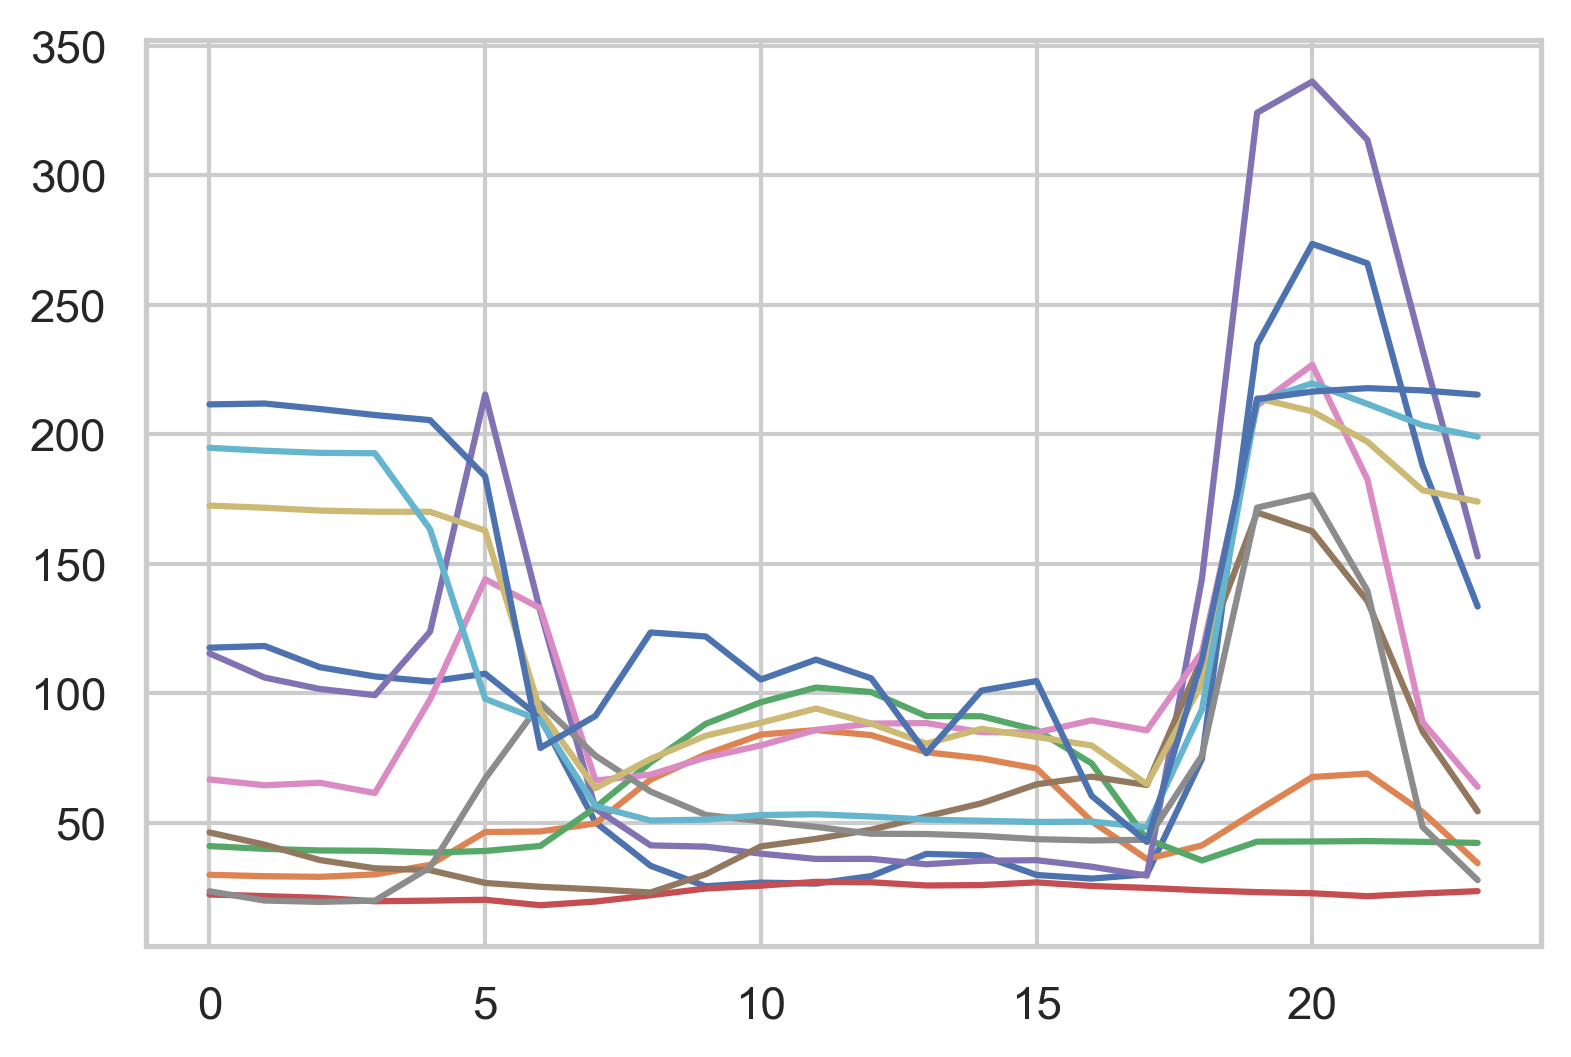

In [4]:
# Plot all sites together
plt.plot(results_frame)

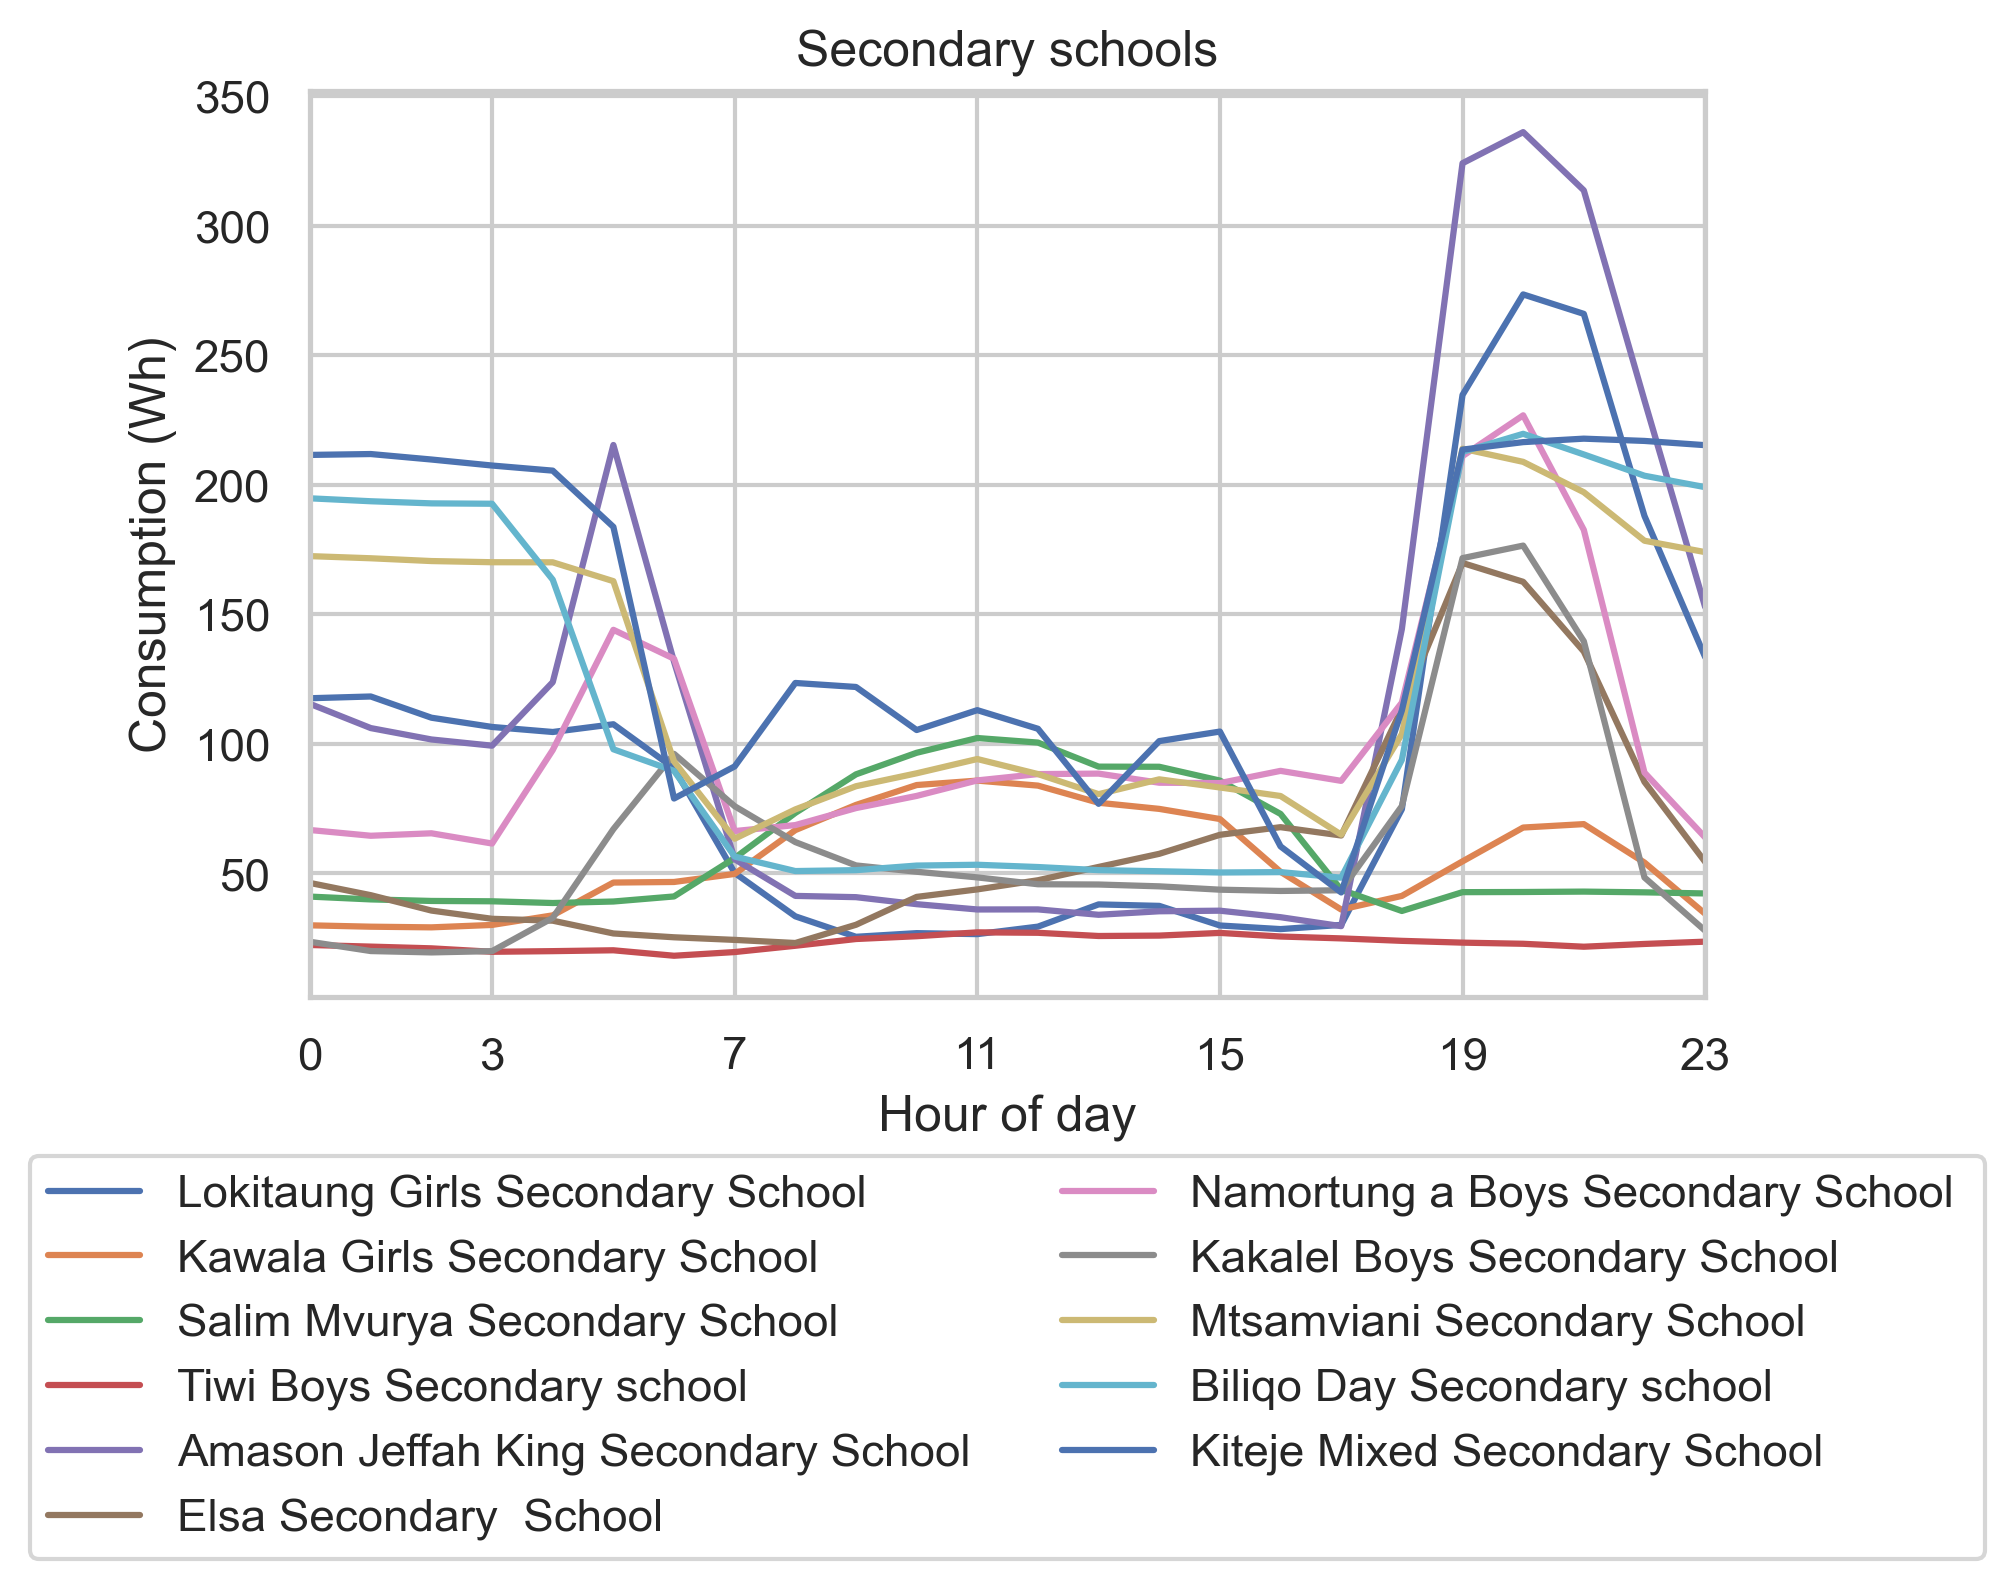

In [5]:
# Plot it with format
plt.plot(results_frame, label=results_frame.columns)  # to do it with matplotlib
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Secondary schools")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

# improve: set different palette so colours don't repeat

In [6]:
# Calculate mean of sites
all_sites = results_frame.mean(axis=1)
# Convert to df
all_sites = pd.DataFrame(all_sites)
# Rename column name of df
all_sites.rename(columns = {0:"Mean"}, inplace = True)

# Calculate std of sites
all_sites["Std_dev"] = results_frame.std(axis=1) 
all_sites.round(2)  # to know peak utilisation of all sites together

,Mean,Std_dev
Timestamp,,
0,94.74,71.51
1,92.65,72.07
2,90.50,71.74
3,89.04,71.56
4,92.92,66.18
5,101.05,67.53
6,76.78,39.26
7,55.37,20.48
8,58.20,29.07


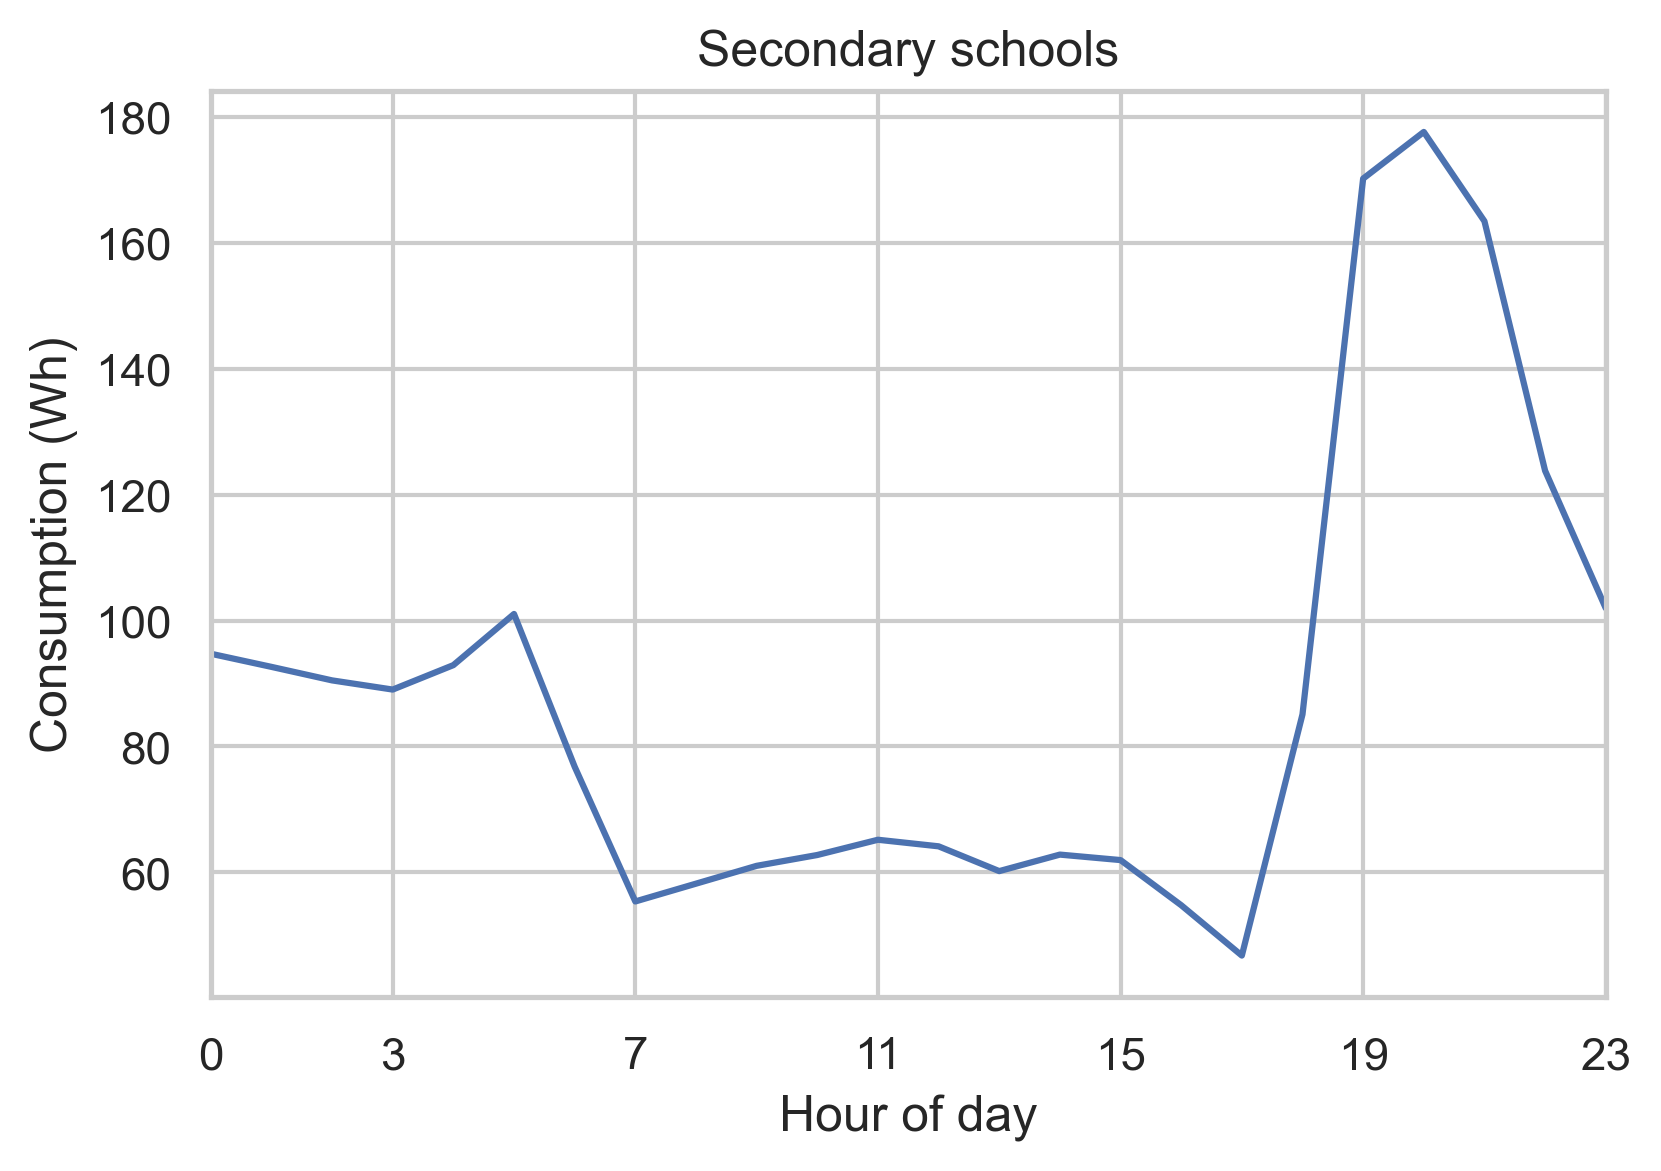

In [7]:
# Plot Mean consumption all sites
#sns.lineplot(data=hrly)
plt.plot(all_sites["Mean"])  # to do it with matplotlib
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Secondary schools")
plt.show()

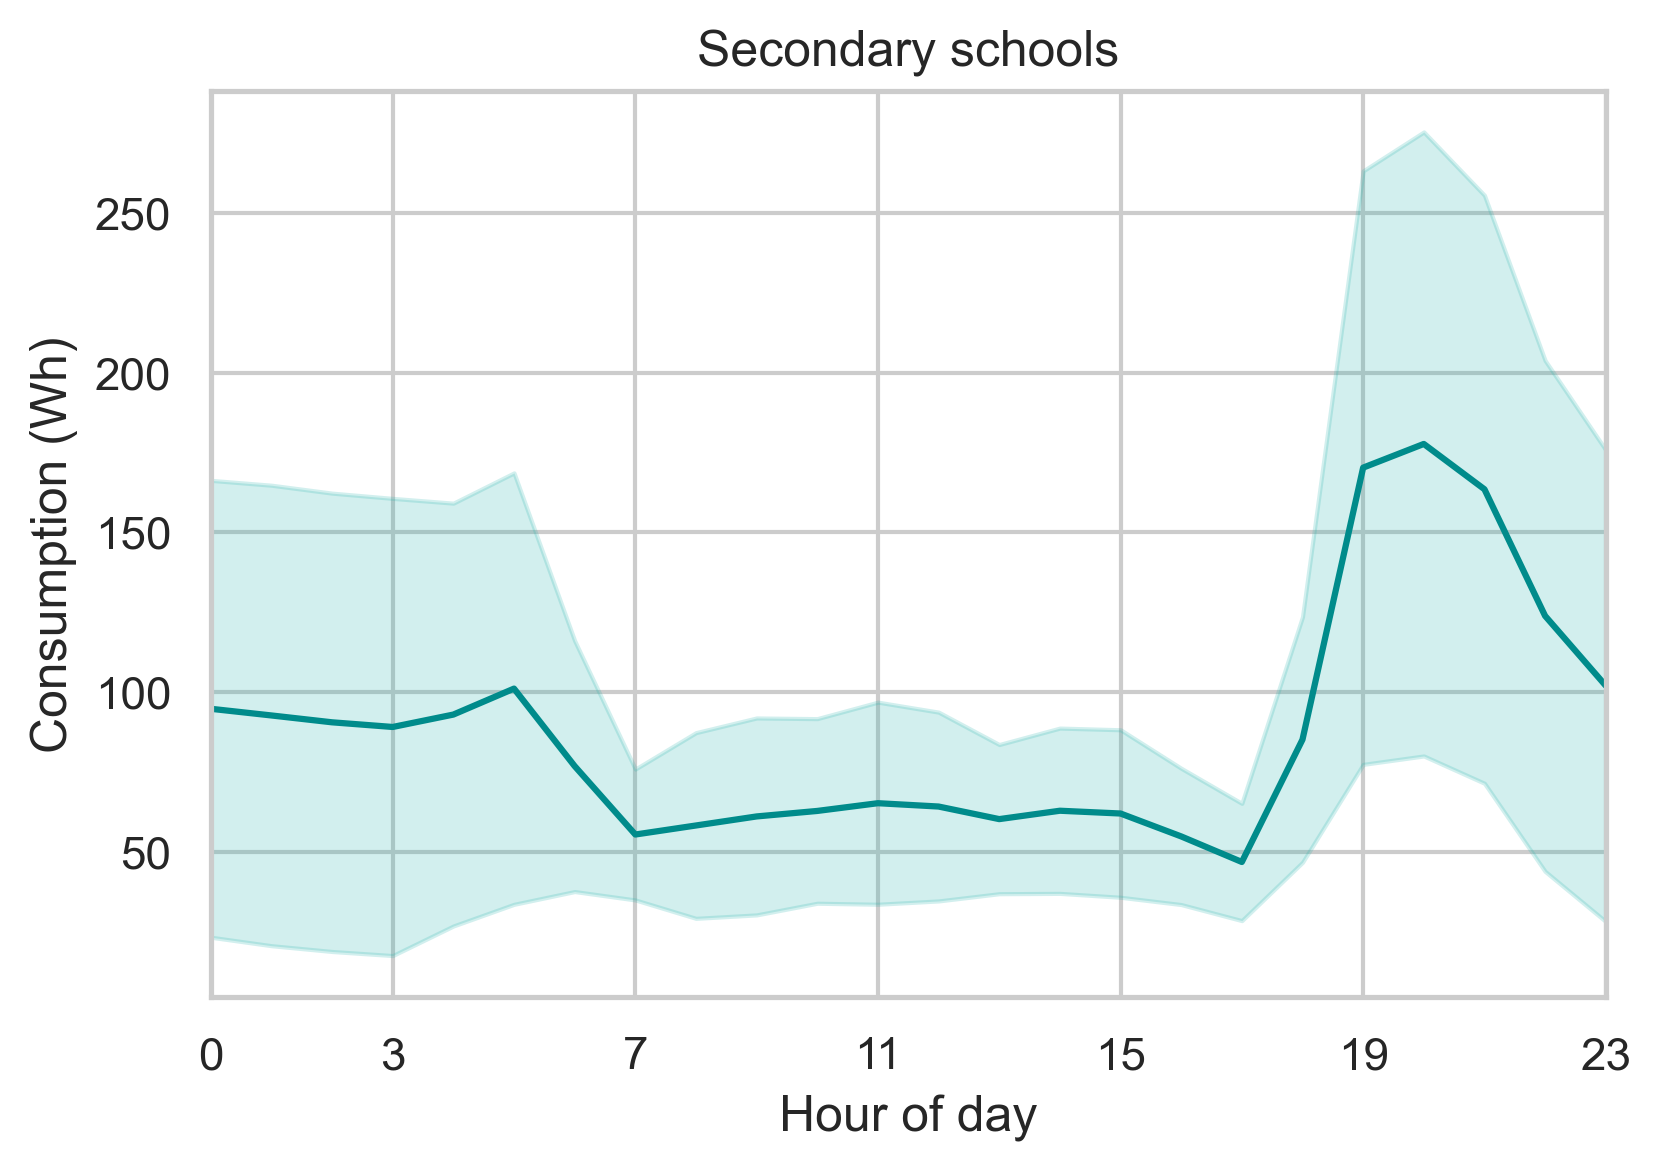

In [8]:
# Reset index to be able to plot it
all_sites = all_sites.reset_index()

# Plot average and std dev hourly utilisation, with shaded area (after resetting index)
ax = plt.gca()
all_sites.plot(kind="line",x="Timestamp",y="Mean", color="darkcyan", ax=ax)
plt.fill_between(all_sites["Timestamp"], all_sites["Mean"] - all_sites["Std_dev"], all_sites["Mean"] + all_sites["Std_dev"], color="lightseagreen",
                 alpha=0.2) # alpha is to make shaded area lighter, save fig in PNG, PDF or SVG
ax.get_legend().remove()
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Secondary schools")
plt.show()

In [9]:
# For another format style option
sns.set(rc={"figure.dpi":300})
sns.set_style("ticks")

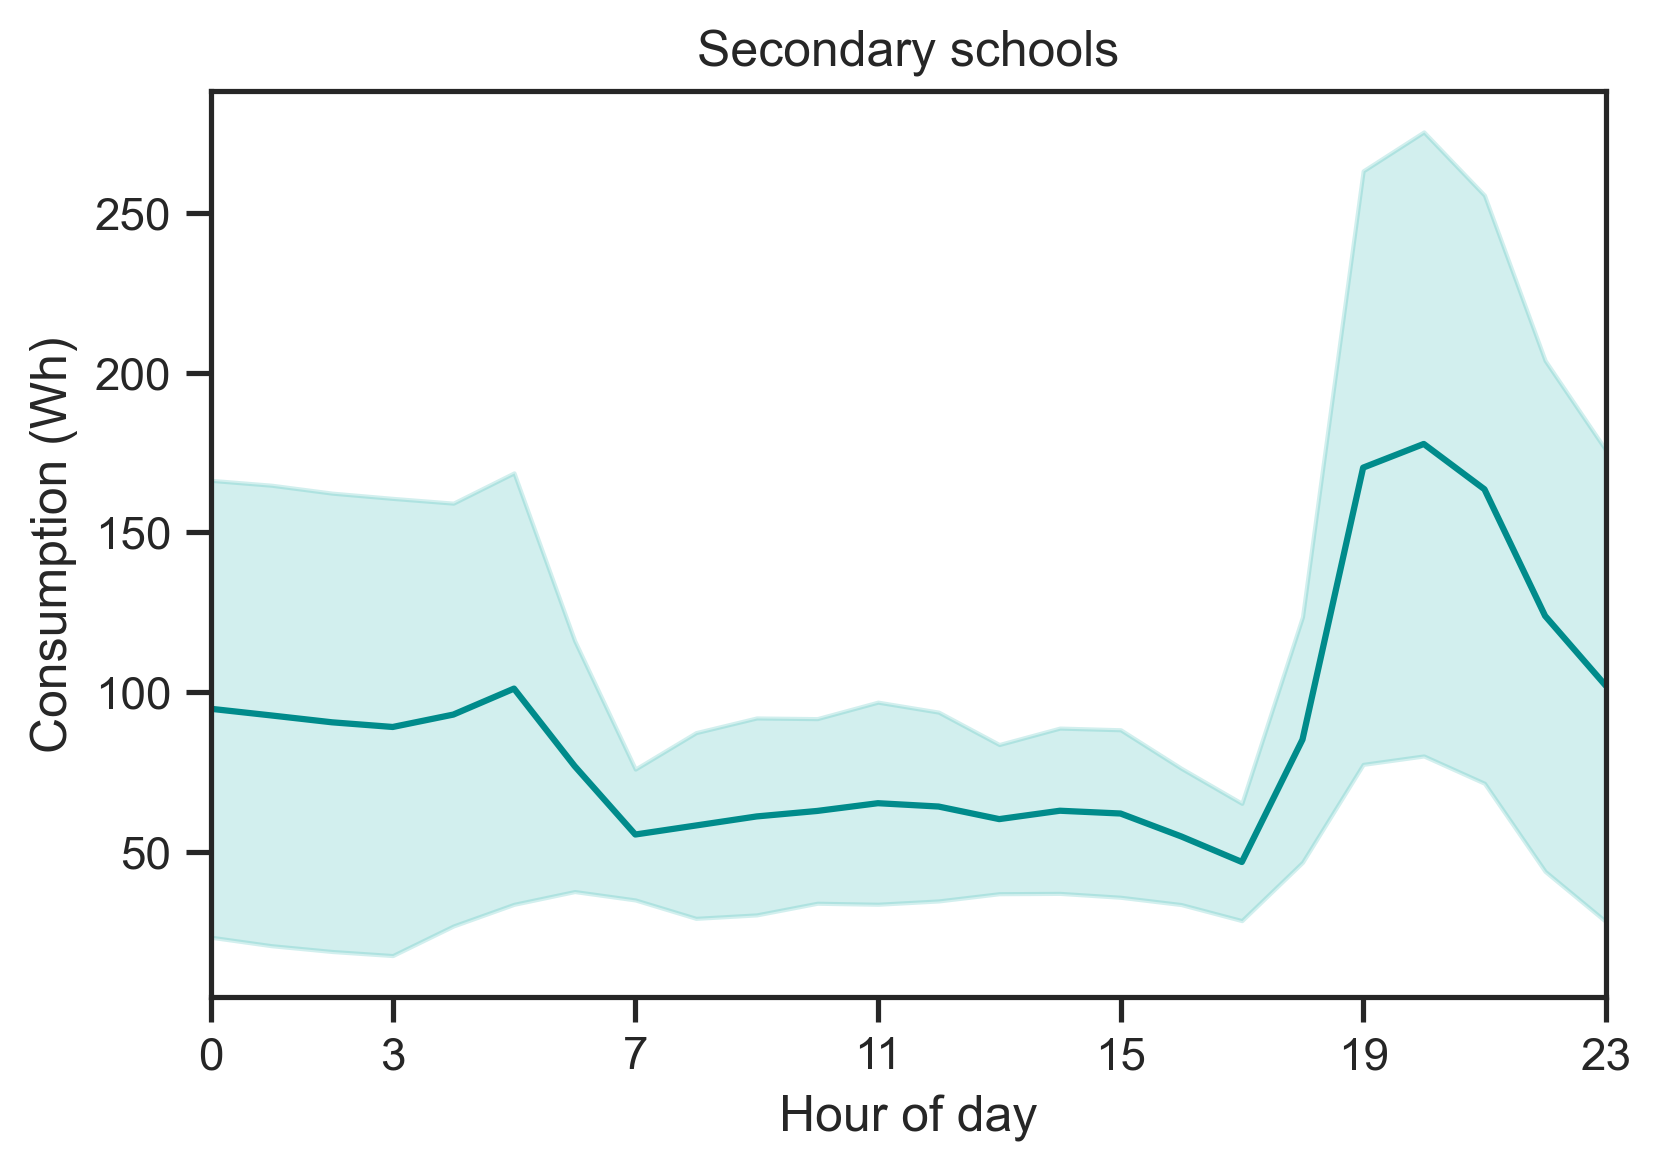

In [10]:
# Repeat above plot
# Plot average and std dev hourly utilisation, with shaded area (after resetting index)
ax = plt.gca()
all_sites.plot(kind="line",x="Timestamp",y="Mean", color="darkcyan", ax=ax)
plt.fill_between(all_sites["Timestamp"], all_sites["Mean"] - all_sites["Std_dev"], all_sites["Mean"] + all_sites["Std_dev"], color="lightseagreen",
                 alpha=0.2) # alpha is to make shaded area lighter, save fig in PNG, PDF or SVG
ax.get_legend().remove()
plt.xlabel("Hour of day")
plt.ylabel("Consumption (Wh)")
plt.xticks([0,3,7,11,15,19,23])
plt.xlim(0,23)
plt.title("Secondary schools")
plt.show()

In [11]:
# To calculate average daily utilisation (all is in Wh)
avg_daily = results_frame.sum().to_frame()

# Rename column name of df
avg_daily.rename(columns = {0:"Avg_daily"}, inplace = True)

avg_daily.round(2)  # to show in Jupyter

,Avg_daily
Lokitaung Girls Secondary School,2282.34
Kawala Girls Secondary School,1324.24
Salim Mvurya Secondary School,1429.83
Tiwi Boys Secondary school,558.39
Amason Jeffah King Secondary School,2813.18
Elsa Secondary School,1479.14
Namortung a Boys Secondary School,2420.58
Kakalel Boys Secondary School,1477.18
Mtsamviani Secondary School,3075.23
Biliqo Day Secondary school,2834.58


In [12]:
# Get stats of average daily values (all sites)
avg_daily.describe().round(2)
# this are values I used in draft to describe utilisation on an average day for all sites of this type

,Avg_daily
count,11.00
mean,2113.04
std,918.33
min,558.39
25%,1453.51
50%,2282.34
75%,2823.88
max,3548.78


In [13]:
# To convert to kWh
avg_daily_kwh = avg_daily.div(1000)
avg_daily_kwh.round(2)  # to show in Jupyter

,Avg_daily
Lokitaung Girls Secondary School,2.28
Kawala Girls Secondary School,1.32
Salim Mvurya Secondary School,1.43
Tiwi Boys Secondary school,0.56
Amason Jeffah King Secondary School,2.81
Elsa Secondary School,1.48
Namortung a Boys Secondary School,2.42
Kakalel Boys Secondary School,1.48
Mtsamviani Secondary School,3.08
Biliqo Day Secondary school,2.83


In [ ]:
# See 'load_profile_utavg.py' for code to re-check outputs for peace of mind if needed
# or for other ways of plotting or calculating data with a different format output 
# this are the plots/values I used in thesis draft Ch. 4 (sent on 3Apr23). 
# Just copy and paste them in word or ppt and then word if it doesn't work.
# Maybe save plots at some point. 
# If i need to rerun it DON'T export csv unless something in the data needs to change in future. 